In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

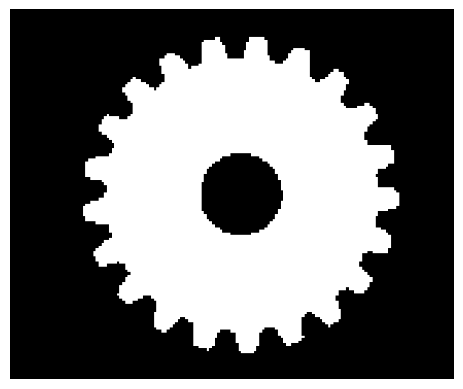

In [26]:
image = cv2.imread("gear_white.png", cv2.IMREAD_GRAYSCALE)
image = (image > 127) * 255

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

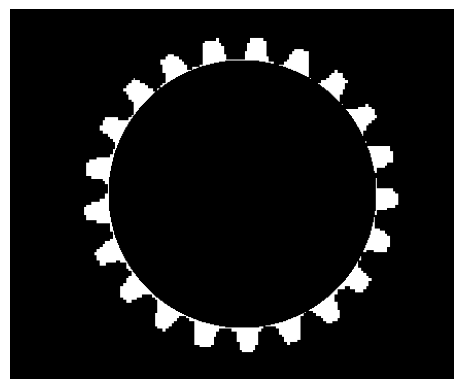

In [38]:
def erode(image, kernel, circle_radius):
    res = np.zeros(image.shape, dtype=np.uint8)
    pad = kernel.shape[0] // 2
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            res[i, j] = np.min(image[i - pad:i + pad + 1, j - pad:j + pad + 1] * kernel)

    center = (image.shape[0] // 2, (image.shape[1] + 20) // 2)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (i - center[0]) ** 2 + (j - center[1]) ** 2 < circle_radius ** 2:
                res[i, j] = 0
    return res

kernel_size = 3
circle_radius = 130
kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
eroded_no_center = erode(image, kernel, circle_radius)

plt.imshow(eroded_no_center, cmap="gray")
plt.axis("off")
plt.show()


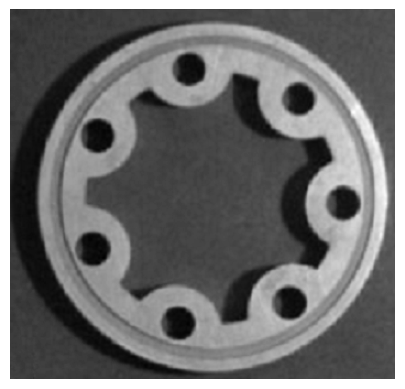

In [15]:
image2 = cv2.imread("gear.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(image2, cmap="gray")
plt.axis("off")
plt.show()

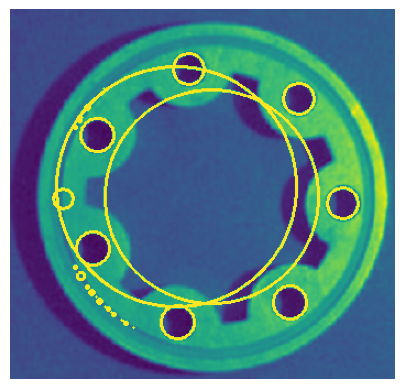

In [39]:
from scipy import ndimage

def find_circles():
    image_array = np.array(image2)
    binary_image = image_array < np.mean(image_array)
    labeled, num_features = ndimage.label(binary_image)
    centers = ndimage.center_of_mass(binary_image, labeled, range(1, num_features+1))
    areas = ndimage.sum(binary_image, labeled, range(1, num_features+1))
    radii = np.sqrt(areas/np.pi)

    return centers, radii

centers, radii = find_circles()

def draw_circles(image, centers, radii):
    image_array = np.array(image)
    for center, radius in zip(centers, radii):
        cv2.circle(image_array, (int(center[1]), int(center[0])), int(radius), (255, 0, 0), 2)
    return image_array

image_with_circles = draw_circles(image2, centers, radii)

plt.imshow(image_with_circles, cmap="gray")
plt.axis("off")
plt.show()